In [135]:
import numpy as np
import numpy.fft as fft
from astropy.io import fits
import matplotlib.pyplot as plt
import galsim

In [136]:
data1 = fits.open('psf2asec-96.psf.fits')[0].data
data2 = fits.open('psf5asec-96.psf.fits')[0].data
print(data1.shape)
print(data2.shape)

(1, 1, 96, 96)
(1, 1, 96, 96)


In [137]:
img1 = data1[0,0,:,:]
img2 = data2[0,0,:,:]
print(img1.shape)
print(img2.shape)

(96, 96)
(96, 96)


### PSF

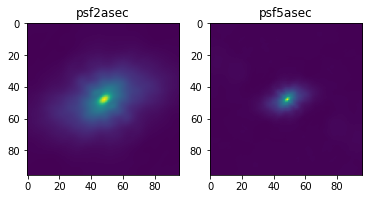

In [139]:
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title('psf2asec')

plt.subplot(1,2,2)
plt.imshow(img2)
plt.title('psf5asec')
plt.show()

### Centered FFT of PSF

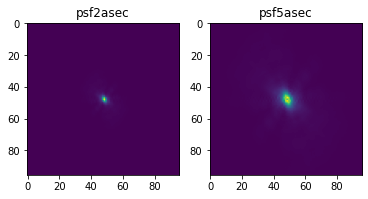

In [142]:
img1_fft = np.abs(fft.fftshift(fft.fft2(img1)))
img2_fft = np.abs(fft.fftshift(fft.fft2(img2)))

plt.subplot(1,2,1)
plt.imshow(img1_fft)
plt.title('psf2asec')

plt.subplot(1,2,2)
plt.imshow(img2_fft)
plt.title('psf5asec')
plt.show()

# Convolution of a Gaussian Galaxy & PSF using Galsim functions

In [246]:
gal_flux = 1.e5    # total counts on the image
gal_sigma = 2.     # arcsec
pixel_scale = 0.2  # arcsec / pixel
noise = 30.        # standard deviation of the counts in each pixel

In [266]:
gal = galsim.Gaussian(flux=gal_flux, sigma=gal_sigma)
psf = galsim.Gaussian(flux=1., sigma=2.)

gal, psf

(galsim.Gaussian(sigma=2.0, flux=100000.0, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05)),
 galsim.Gaussian(sigma=2.0, flux=1.0, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05)))

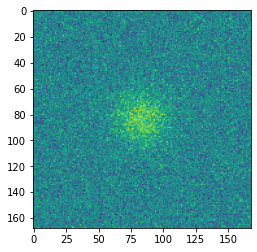

In [267]:
final = galsim.Convolve([gal, psf])
image = final.drawImage(scale=pixel_scale)
image.addNoise(galsim.GaussianNoise(sigma=noise))

plt.imshow(image.array)
plt.show()

# Convolution of the given PSF with a Gaussian Galsim Object (multiplication in Fourier Space)

In [250]:
gal_1 = galsim.Gaussian(flux=gal_flux, sigma=gal_sigma).drawImage()   # stored as Galsim object
psf_img1 = galsim.Image(img1, copy=True)                              # copied from img1 & stored as Galsim object

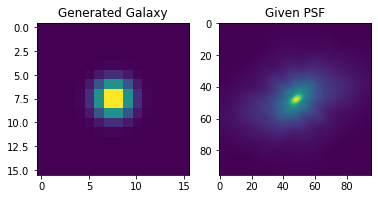

Dimensions - (16, 16) (96, 96)


In [282]:
plt.subplot(1,2,1)
plt.imshow(gal_1.array)
plt.title('Generated Galaxy')

plt.subplot(1,2,2)
plt.imshow(psf_img1.array)
plt.title('Given PSF')
plt.show()

m = gal_1.array.shape
n = psf_img1.array.shape
print('Dimensions -', m,n) 

### FFT with Padding

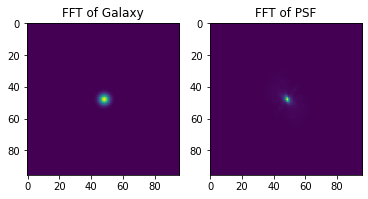

Dimensions - (96, 96) (96, 96)


In [283]:
gal_1_fft = np.pad(np.abs(fft.fftshift(fft.fft2(gal_1.array))), (abs(m[0]-n[0])//2, abs(m[1]-n[1])//2 ), 'constant')     
psf_img1_fft = np.abs(fft.fftshift(fft.fft2(psf_img1.array)))        # padded to match dimensions

plt.subplot(1,2,1)
plt.imshow(gal_1_fft)
plt.title('FFT of Galaxy')

plt.subplot(1,2,2)
plt.imshow(psf_img1_fft)
plt.title('FFT of PSF')
plt.show()

print('Dimensions -', gal_1_fft.shape, psf_img1_fft.shape)

### Convolution

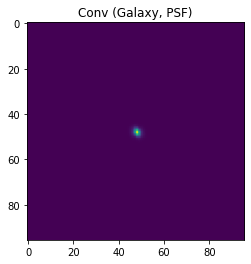

In [284]:
conv1 = np.multiply(gal_1_fft, psf_img1_fft)

plt.imshow(conv1)
plt.title('Conv (Galaxy, PSF)')
plt.show()

### Add Gaussian Noise

Without Noise
 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


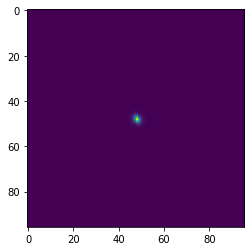



With Noise
 
 [[  407250.59022023   250470.76121576  1191161.65435613 ...
  -1674867.47141538   396312.1124767   1716698.65802314]
 [  798279.14882109  1098061.02378771 -1198930.57744792 ...
   -523010.04319423   -88288.74250568   140346.61084332]
 [ -710798.70755601  -880393.69613803    93838.90372152 ...
   -642618.58544531  1038148.38964087  -935390.19392038]
 ...
 [  837796.69801663  -356122.25276064  -523505.46133754 ...
    745711.82013601   348520.44502714   202300.54528412]
 [ 1921198.7109     -1497360.55958635  -797975.05886955 ...
  -1052298.14233312 -1141300.25421882 -2215450.44254657]
 [ 1018790.49062018  -535062.76561333  -144112.04328785 ...
   -746621.6228392   -228747.85628273   938904.95793751]]


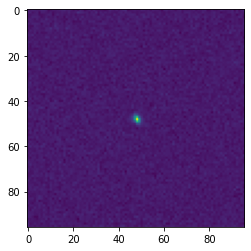

In [285]:
conv1_GSO = galsim.Image(conv1, copy=True)                      # Stored as GSO
print('Without Noise\n', '\n', conv1_GSO.array)
plt.imshow(conv1_GSO.array)
plt.show()

conv1_GSO.addNoise(galsim.GaussianNoise(sigma=1e6))              # Gaussian Noise with std = 1e6
print('\n\nWith Noise\n', '\n', conv1_GSO.array)
plt.imshow(conv1_GSO.array)
plt.show()